Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


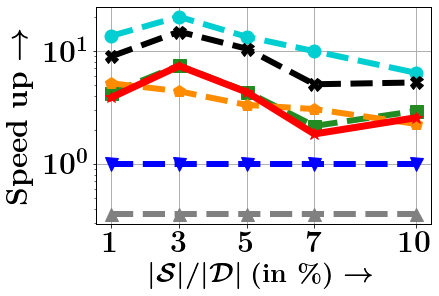

In [6]:
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
!apt install cm-super
!pip install brewer2mpl

import pickle

### FOR DEEP

#dataset = 'NY_Stock_exchange_high'
#dataset = 'NY_Stock_exchange_close'

#dataset = 'cadata'
dataset = 'LawSchool'

#file="/content/NY_Stock_exchange_high_deep.pkl"
#file="/content/NY_Stock_exchange_close_deep.pkl"
#file="/content/cadata_deep.pkl"
file="/content/LawSchool_deep.pkl"

ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084}
nn = ts_size[dataset]
openfile = open(file, "rb")
score_dict = pickle.load(openfile)

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)

def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

# methods = ['Full-selection', 'Full-with-constraints', 'Random',\
#             'Random-with-constraints', 'CRAIG', 'GLISTER', 'SELCON-without-constraints',\
#             'SELCON']
score_dict['S']
score_dict['mean_error'].keys()
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']
# 'Random with Constraints', 'SELCON', 'Random', 
#'CRAIG', 'GLISTER', 'SELCON without Constraints', 'Full with Constraints', 'Full'
tmax= score_dict['time']['Full'][0]

# score_dict['mean_error']['diff_SEAL']
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints',  'GLISTER', 'SELCON without Constraints',\
            'SELCON'] #'CRAIG',

color_list = [(0, 0, 1),'gray', 'darkturquoise','forestgreen','darkorange',
            (0,0,0),(1, 0, 0),'gold','purple',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
marker_list = ['v','^','o','s','p','X','*'] #'d',
 

import numpy as np
latexify()

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
    i=i+1
 
    if baseline == 'SELCON': 
        ax.plot(score_dict['S'],tmax/score_dict['time'][baseline],\
            linewidth=7, 
                markersize=13, marker= marker_list[i],color=color_list[i])
    elif baseline == 'CRAIG': 
        continue
    else:
        ax.plot(score_dict['S'],tmax/score_dict['time'][baseline],\
            linewidth=6,linestyle='dashed',
                markersize=13, marker= marker_list[i],color=color_list[i])

    #plt.xlabel(r'$|\mathcal{S}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)

    plt.xlabel(r'$|\mathcal{S}|/|\mathcal{D}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)
 
 
    ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

    plt.ylabel(r'$\mathrm{Speed\ up}\rightarrow$ ', fontsize=30, labelpad=10)

    plt.yscale("log")
    plt.grid(axis='y',linestyle='-', linewidth=1)
    plt.grid(axis='x',linestyle='-', linewidth=1)

    if dataset is 'NY_Stock_exchange_high':
        plt.xticks([0.1,0.3,0.5,0.7,1])
        plt.yticks([1,10,1e1,1e2,1e3])
        
    if dataset is 'NY_Stock_exchange_close':
        plt.xticks([0.1,0.3,0.5,0.7,1])
        plt.yticks([1,10,1e1,1e2,1e3])

    if dataset is 'cadata':
        plt.xticks([1,3,5,7,10])
        #plt.yticks([1e-5,1e-4])
        #plt.yticks([1,.6,.4,.3],[r'\textbf{1.0}',r'\textbf{0.6}',r'\textbf{0.4}',r'\textbf{0.3}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
        #plt.ylim(top=9e-5)'''

    if dataset is 'LawSchool':
        plt.xticks([1,3,5,7,10])
        #plt.yticks([1e-5,1e-4])
        #plt.yticks([1,.6,.4,.3],[r'\textbf{1.0}',r'\textbf{0.6}',r'\textbf{0.4}',r'\textbf{0.3}'])
        #plt.text(0.08, 8e-5, r'$ \times 10^{-5}$', fontsize=27)
        #plt.ylim(top=9e-5)'''
    
    plt.box(on=True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)

    pic = dataset+"_time_deep.pdf"
    plt.savefig(pic, bbox_inches='tight')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


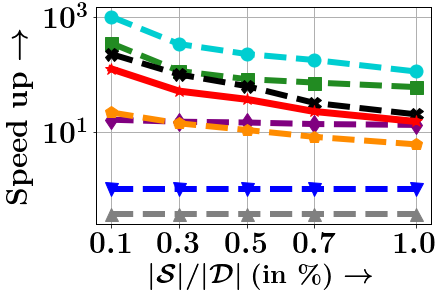

In [11]:
###figure 2--- drill down analysis--- improvement of performance in terms of gain
#from Util import *

datasets = ['cadata','LawSchool','MSD','NY_Stock_exchange_high','NY_Stock_exchange_close']
files = ['/content/cadata.pkl','/content/LawSchool.pkl','/content/MSD.pkl','/content/NY_Stock_exchange_high.pkl',\
         '/content/NY_Stock_exchange_close.pkl']

d = 3

file = files[d]
dataset = datasets[d]

ts_size = {'cadata':2064, 'LawSchool':2080, 'MSD': 51630, 'NY_Stock_exchange_close': 78084,
          'NY_Stock_exchange_high':78084}
nn = ts_size[dataset]
openfile = open(file, "rb")
score_dict = pickle.load(openfile)

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import brewer2mpl
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
color_list = bmap.mpl_colors
color_list = [(0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
             (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
             (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
             (1.0, 0.8509803921568627, 0.1843137254901961),
             (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
             (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

color_list = [(1, 0, 0),
             (0, 0, 1),
              (0,0,0),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
             (0,0,0),
#              (0.4, 0.7607843137254902, 0.6470588235294118),
             (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),]



def latexify():
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bbm}"]
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}"]


    plt.rc('axes', linewidth=1)
    plt.rc('font', weight='bold')
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

 

# methods = ['Full-selection', 'Full-with-constraints', 'Random',\
#             'Random-with-constraints', 'CRAIG', 'GLISTER', 'SELCON-without-constraints',\
#             'SELCON']
score_dict['S']
score_dict['mean_error'].keys()
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']
# 'Random with Constraints', 'SELCON', 'Random', 
#'CRAIG', 'GLISTER', 'SELCON without Constraints', 'Full with Constraints', 'Full'
tmax= score_dict['time']['Full'][0]

# score_dict['mean_error']['diff_SEAL']
methods = ['Full', 'Full with Constraints', 'Random',\
            'Random with Constraints', 'CRAIG', 'GLISTER', 'SELCON without Constraints',\
            'SELCON']

color_list = ['darkturquoise','forestgreen','mediumvioletred','darkorange',
            (0,0,0),(0,0.576, 0.68),(0, 0, 1), (1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]

color_list = [(0, 0, 1),'purple', 'darkturquoise','forestgreen','mediumvioletred','darkorange',
            (0,0,0),(1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
color_list = [(0, 0, 1),'gray', 'darkturquoise','forestgreen','purple','darkorange',
            (0,0,0),(1, 0, 0),'gold',
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),]
marker_list = ['v','^','o','s','d','p','X','*'] 
 

import numpy as np
latexify()

i=-1
fig, ax = plt.subplots()
for baseline in methods:# score_dict['mean_error'].keys():
    i=i+1
 
    if baseline == 'SELCON': 
        ax.plot(score_dict['S'],tmax/score_dict['time'][baseline],\
            linewidth=7, 
                markersize=13, marker= marker_list[i],color=color_list[i])
    else:
        ax.plot(score_dict['S'],tmax/score_dict['time'][baseline],\
            linewidth=6,linestyle='dashed',
                markersize=13, marker= marker_list[i],color=color_list[i])

    #plt.xlabel(r'$|\mathcal{S}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)

    plt.xlabel(r'$|\mathcal{S}|/|\mathcal{D}|$  \textbf{(in \%)} $\rightarrow$', fontsize=27)
     
 
    ax.legend(prop={'size': 22}, frameon=False,handlelength=0.4)

    plt.ylabel(r'$\mathrm{Speed\ up}\rightarrow$ ', fontsize=30, labelpad=10)

    plt.yscale("log")
    plt.grid(axis='y',linestyle='-', linewidth=1)
    plt.grid(axis='x',linestyle='-', linewidth=1)

    if dataset is 'cadata':
        plt.xticks([1,3,5,7,10])
#         plt.yticks([0.05,0.08,0.11,0.14])
#         plt.xlim(left=0.08)
    if dataset is 'LawSchool':
        plt.xticks([1,3,5,7,10])
#         plt.yticks([0,1,2,3,4])

    if dataset is 'MSD':
        plt.xticks([0.1,0.3,0.5,0.7,1])
#         plt.yticks([0.5,0.75,1.00,1.25,1.50])
        
        
    if dataset is 'NY_Stock_exchange_high':
        plt.xticks([0.1,0.3,0.5,0.7,1])
#         plt.yticks([0,2e-5,4e-5,6e-5,8e-5])
        
    if dataset is 'NY_Stock_exchange_close':
        plt.xticks([0.1,0.3,0.5,0.7,1])
        plt.yticks([1,10,1e1,1e2,1e3])
    
    plt.box(on=True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

#     ax.set_title(r'\textbf{Gain} = $\textbf{AP}($\textsc{PermGNN})-$\textbf{AP}($\textbf{baseline})', fontsize=19)

    pic = dataset+"_time.pdf"
    plt.savefig(pic, bbox_inches='tight')

In [ ]:
score_dict['time']

{'Random with Constraints': array([10.273303, 10.853995, 11.330295, 19.396706, 20.07392 ],
       dtype=float32),
 'SELCON': array([11.593514, 11.257266, 11.338817, 20.142937, 21.386328],
       dtype=float32),
 'Random': array([3.0064828, 2.4317515, 2.7383597, 7.327407 , 5.69062  ],
       dtype=float32),
 'CRAIG': array([19.877264, 24.192492, 27.408337, 29.312078, 31.558168],
       dtype=float32),
 'GLISTER': array([16.632168, 13.220714, 17.063292, 19.083647, 28.829853],
       dtype=float32),
 'SELCON without Constraints': array([3.8779316, 4.917107 , 5.477039 , 7.7212386, 9.309937 ],
       dtype=float32),
 'Full with Constraints': array([637.2007, 637.2007, 637.2007, 637.2007, 637.2007], dtype=float32),
 'Full': array([134.77643, 134.77643, 134.77643, 134.77643, 134.77643],
       dtype=float32)}